In [1]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
import os

os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/Colab Notebooks/kaggle_api"   # folder path

In [9]:
%mkdir /content/data

%cd /content/data

mkdir: cannot create directory ‘/content/data’: File exists
/content/data


In [13]:
! kaggle datasets download -d sripaadsrinivasan/audio-mnist

 99% 937M/948M [00:15<00:00, 62.8MB/s]
100% 948M/948M [00:15<00:00, 63.3MB/s]


In [14]:
! unzip /content/data/audio-mnist.zip

Streaming output truncated to the last 5000 lines.
  inflating: data/51/0_51_1.wav      
  inflating: data/51/0_51_10.wav     
  inflating: data/51/0_51_11.wav     
  inflating: data/51/0_51_12.wav     
  inflating: data/51/0_51_13.wav     
  inflating: data/51/0_51_14.wav     
  inflating: data/51/0_51_15.wav     
  inflating: data/51/0_51_16.wav     
  inflating: data/51/0_51_17.wav     
  inflating: data/51/0_51_18.wav     
  inflating: data/51/0_51_19.wav     
  inflating: data/51/0_51_2.wav      
  inflating: data/51/0_51_20.wav     
  inflating: data/51/0_51_21.wav     
  inflating: data/51/0_51_22.wav     
  inflating: data/51/0_51_23.wav     
  inflating: data/51/0_51_24.wav     
  inflating: data/51/0_51_25.wav     
  inflating: data/51/0_51_26.wav     
  inflating: data/51/0_51_27.wav     
  inflating: data/51/0_51_28.wav     
  inflating: data/51/0_51_29.wav     
  inflating: data/51/0_51_3.wav      
  inflating: data/51/0_51_30.wav     
  inflating: data/51/0_51_31.wav     

In [33]:
import pandas as pd
import numpy as np
import os
import librosa 
import tensorflow as tf
import librosa.display
import IPython
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
import tensorflow.keras.layers as layers
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score
from sklearn.model_selection import train_test_split


#Person Audio

In [18]:
Person30='/content/data/data/03/0_03_1.wav'
IPython.display.Audio(Person30)

In [19]:
x, fs = librosa.load(Person30)
print(fs)

22050


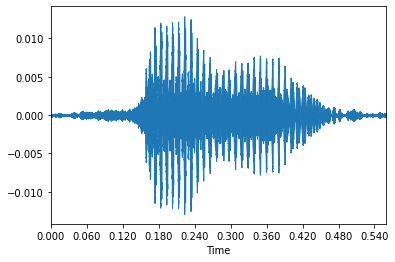

In [20]:
librosa.display.waveplot(x, fs)


In [24]:
ID=[]
label=[]
# import required module
import os
# assign directory
directory = '/content/data/data/'
 
# iterate over files in
# that directory

for folder in os.listdir(directory):                               #go into the directory
    for filename in os.listdir(directory+str(folder)):          #go in every class 
        f = os.path.join(directory+str(folder), filename)    #scan through every file in that class
        if os.path.isfile(f):
            ID.append(f.split('/')[-1])
            label.append(f.split('/')[-2])

In [27]:
data=pd.DataFrame()
data['ID']=ID
data['label']=label

In [28]:
data


,ID,label
0,2_27_47.wav,27
1,6_27_9.wav,27
2,6_27_32.wav,27
3,1_27_38.wav,27
4,6_27_43.wav,27
...,...,...
29995,4_07_49.wav,07
29996,8_07_4.wav,07
29997,3_07_4.wav,07
29998,6_07_15.wav,07


In [29]:
def extract_features(directory):
    features=[]
    ID=[]
    for folder in os.listdir(directory):
        for filename in os.listdir(directory+str(folder)):
            f = os.path.join(directory+str(folder), filename)
            if os.path.isfile(f):
                x,sr=librosa.load(f, res_type='kaiser_fast',sr=None)
                mfccs=np.mean(librosa.feature.mfcc(x,sr=sr,n_mfcc=100).T,axis=0)
                features.append(mfccs)
                ID.append(f.split('/')[-1])
    return [ID, features]

In [32]:
ID, features=extract_features('/content/data/data/')


In [34]:
#checking that if they are same, there should be no zero or false value

print(np.count_nonzero(data.ID==ID) )

#the ablove thing should be equal to the original shape of ID's in train_data

len(data.ID)==np.count_nonzero(data.ID==ID) 

30000


True

In [35]:
X=np.array(features)
Y=data.label

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)


In [36]:
#label encode Y_train and Y_test

le=LabelEncoder()

temp=le.fit_transform(Y_train)
Y_train=temp.reshape(-1,1)

temp=le.fit_transform(Y_test)
Y_test=temp.reshape(-1,1)

In [37]:
print(X_train.shape,X_test.shape)
print(Y_train.shape,Y_test.shape)   

(21000, 100) (9000, 100)
(21000, 1) (9000, 1)


In [38]:
model=tf.keras.Sequential()
model.add(layers.Dense(input_shape=(100,), units=80, activation='relu'))
model.add(layers.Dense(60,activation='relu'))
model.add(layers.Dense(40,activation='relu'))
model.add(layers.Dense(60,activation='softmax'))

In [39]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 80)                8080      
                                                                 
 dense_1 (Dense)             (None, 60)                4860      
                                                                 
 dense_2 (Dense)             (None, 40)                2440      
                                                                 
 dense_3 (Dense)             (None, 60)                2460      
                                                                 
Total params: 17,840
Trainable params: 17,840
Non-trainable params: 0
_________________________________________________________________


In [42]:
model.compile(optimizer='adam',loss='SparseCategoricalCrossentropy',metrics=['accuracy'])


In [43]:
hist=model.fit(X_train,Y_train,epochs=100)


Epoch 1/100
657/657 [==============================] - 4s 2ms/step - loss: 4.0944 - accuracy: 0.0555
Epoch 2/100
657/657 [==============================] - 2s 2ms/step - loss: 3.2270 - accuracy: 0.1428
Epoch 3/100
657/657 [==============================] - 2s 2ms/step - loss: 2.3457 - accuracy: 0.3551
Epoch 4/100
657/657 [==============================] - 2s 3ms/step - loss: 1.4151 - accuracy: 0.5758
Epoch 5/100
657/657 [==============================] - 2s 2ms/step - loss: 0.8224 - accuracy: 0.7467
Epoch 6/100
657/657 [==============================] - 2s 2ms/step - loss: 0.5461 - accuracy: 0.8318
Epoch 7/100
657/657 [==============================] - 2s 2ms/step - loss: 0.4320 - accuracy: 0.8645
Epoch 8/100
657/657 [==============================] - 2s 2ms/step - loss: 0.3675 - accuracy: 0.8837
Epoch 9/100
657/657 [==============================] - 2s 2ms/step - loss: 0.3128 - accuracy: 0.9020
Epoch 10/100
657/657 [==============================] - 2s 2ms/step - loss: 0.2783 - accura

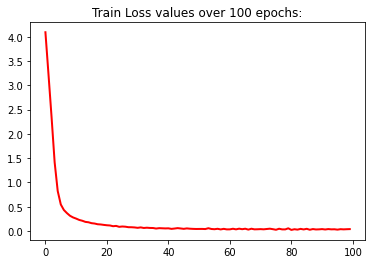

In [44]:
plt.title('Train Loss values over 100 epochs:')
plt.plot(hist.history['loss'],color='red',linewidth=2)
plt.show()

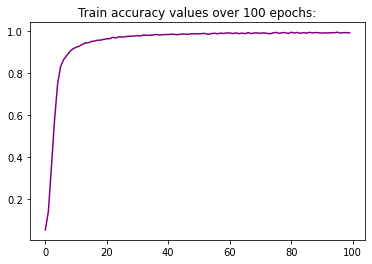

In [45]:
plt.title('Train accuracy values over 100 epochs:')
plt.plot(hist.history['accuracy'],color='purple')
plt.show()

In [73]:
Y_pred=model.predict(X_test)
Y_pred.shape

(9000, 60)

In [53]:
#Y_pred=(Y_pred>0.5)*1
Y_test[0]

array([59])

In [55]:
# Y_test = tf.keras.utils.to_categorical(
#     Y_test, num_classes=60, dtype='float32'
# )
# Y_test.shape

(9000, 60)

In [60]:
Y_test

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [66]:
Y_pred

array([[1.0578696e-34, 0.0000000e+00, 0.0000000e+00, ..., 3.5022793e-23,
        0.0000000e+00, 1.0000000e+00],
       [4.8544484e-11, 5.3135853e-20, 1.5585809e-37, ..., 3.9658155e-32,
        7.0660289e-17, 1.1565099e-27],
       [5.7244133e-29, 0.0000000e+00, 0.0000000e+00, ..., 2.0583292e-35,
        7.6990814e-27, 4.0357061e-27],
       ...,
       [2.5315454e-36, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.2931595e-21, 5.7272634e-14, 8.9111985e-16, ..., 0.0000000e+00,
        7.7177363e-24, 0.0000000e+00],
       [1.6365985e-27, 4.5831541e-13, 1.3937451e-27, ..., 0.0000000e+00,
        1.4566250e-21, 0.0000000e+00]], dtype=float32)

In [72]:
# for i in range(9000):
#   for j in range(60):
#     if Y_pred[i][j] > 0.75:
#       Y_pred[i][j] = 1
#     else:
#       Y_pred[i][j] = 0

# Y_pred

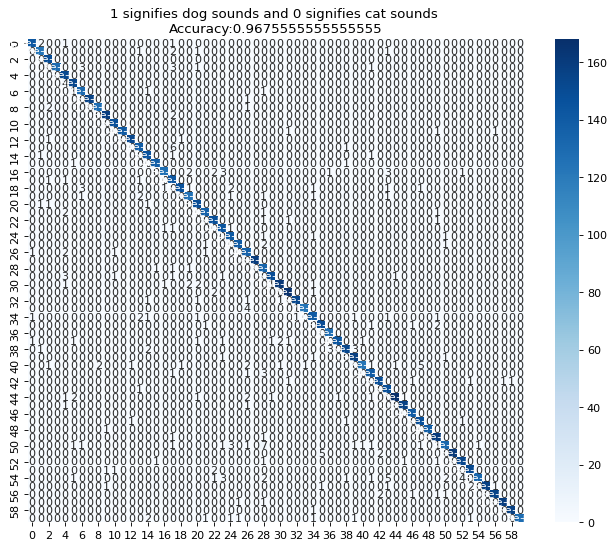

In [74]:
plt.figure(figsize=(10,8),dpi=80)
sns.heatmap(confusion_matrix(Y_test,Y_pred.argmax(axis=1)),annot=True,cmap='Blues')
plt.title('1 signifies dog sounds and 0 signifies cat sounds \n'+'Accuracy:'+str(accuracy_score(Y_test,Y_pred.argmax(axis=1))))
plt.show()

In [75]:
print(classification_report(Y_test,Y_pred.argmax(axis=1)))


              precision    recall  f1-score   support

           0       0.98      0.97      0.98       147
           1       0.96      0.96      0.96       128
           2       0.96      1.00      0.98       149
           3       1.00      0.94      0.97       137
           4       0.90      1.00      0.95       152
           5       0.96      0.97      0.97       157
           6       0.94      0.98      0.96       133
           7       1.00      0.99      1.00       157
           8       0.98      0.98      0.98       131
           9       0.98      0.99      0.98       161
          10       0.98      1.00      0.99       148
          11       1.00      0.98      0.99       144
          12       0.99      0.99      0.99       155
          13       0.95      0.95      0.95       146
          14       0.95      0.98      0.96       149
          15       0.99      0.99      0.99       140
          16       0.98      0.91      0.94       138
          17       0.87    